# Predicting Soccer results with Machine Learning

## TO DO:

- fix nulls
- make referee data frame and drop refs.


MO

Let's import the libraries that we will be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's import the data:

In [2]:
data = pd.read_csv("Euro-Football_2012-2023.csv")

Let's make sure that everything imported correctly by checking the first 5 rows:

In [3]:
data.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,dkkXCXT5QHMYiCvDBUCJQC,England,Premier League,E0,2012-2013,18/08/12,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,dAmonz9YM7qKwwvBsSoJo5,England,Premier League,E0,2012-2013,18/08/12,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,YwUhmYU4naswHgTHQgNDaW,England,Premier League,E0,2012-2013,18/08/12,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,iEk9YuADjHNVFduiEEHXSK,England,Premier League,E0,2012-2013,18/08/12,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,bLQW9sPVeiPZA5bJN2jpW8,England,Premier League,E0,2012-2013,18/08/12,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [4]:
print(f'The shape of the dataset is {data.shape[0]} rows and {data.shape[1]} columns')

The shape of the dataset is 140763 rows and 27 columns


Everything looks good, now let's check the columns:

In [5]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR'],
      dtype='object')


The columns can be unclear in the abbreviations so we can rename them to reduce confusion:

In [6]:
data = data.rename(columns={'FTR': 'Result'})
data = data.rename(columns={'HTR': 'HalfTimeResult'})
data = data.rename(columns={'FTHG': 'HomeScore'})
data = data.rename(columns={'FTAG': 'AwayScore'})
data = data.rename(columns={'HTHG': 'HalfTimeHomeGoals'})
data = data.rename(columns={'HTAG': 'HalfTimeAwayGoals'})
data = data.rename(columns={'HS': 'HomeShots'})
data = data.rename(columns={'AS': 'AwayShots'})
data = data.rename(columns={'HST': 'HomeShotsOnTarget'})
data = data.rename(columns={'AST': 'AwayShotsOnTarget'})
data = data.rename(columns={'HF': 'HomeFouls'})
data = data.rename(columns={'AF': 'AwayFouls'})
data = data.rename(columns={'HF': 'HomeCorners'})
data = data.rename(columns={'AF': 'AwayCorners'})
data = data.rename(columns={'HC': 'HomeCorners'})
data = data.rename(columns={'AC': 'AwayCorners'})
data = data.rename(columns={'HY': 'HomeYellowCards'})
data = data.rename(columns={'AY': 'AwayYellowCards'})
data = data.rename(columns={'HR': 'HomeRedCards'})
data = data.rename(columns={'AR': 'AwayRedCards'})

In [7]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'HomeScore', 'AwayScore', 'Result',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeFouls',
       'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')


That's better. Now let's check the data types of our columns:

In [86]:
data.dtypes

id                           object
Country                      object
League                       object
Div                          object
Season                       object
Date                 datetime64[ns]
HomeTeam                     object
AwayTeam                     object
Referee                      object
HomeScore                   float64
AwayScore                   float64
Result                       object
HalfTimeHomeGoals           float64
HalfTimeAwayGoals           float64
HalfTimeResult               object
HomeShots                   float64
AwayShots                   float64
HomeShotsOnTarget           float64
AwayShotsOnTarget           float64
HomeFouls                   float64
AwayFouls                   float64
HomeCorners                 float64
AwayCorners                 float64
HomeYellowCards             float64
AwayYellowCards             float64
HomeRedCards                float64
AwayRedCards                float64
dtype: object

Most of our columns are floats, which will be useful for modeling. The `Result` and `HalfTimeResult` columns are object's which will need to be split into dummy or ternary columns for Home Win, Away Win or Draw. The date is an object, so we can convert it to `datetime` format:

In [87]:
#convert data to datetime
data["Date"] = pd.to_datetime(data["Date"])

In [88]:
data.Country.value_counts()

England     22991
France       9031
Italy        8892
Spain        8662
Germany      7236
Scotland     5710
Name: Country, dtype: int64

In [11]:
data.isnull().sum()

id                        0
Country                   0
League                    0
Div                     105
Season                    0
Date                    105
HomeTeam                105
AwayTeam                105
Referee              109294
HomeScore               107
AwayScore               107
Result                  107
HalfTimeHomeGoals       165
HalfTimeAwayGoals       165
HalfTimeResult          165
HomeShots             76754
AwayShots             76754
HomeShotsOnTarget     76754
AwayShotsOnTarget     76754
HomeFouls             78092
AwayFouls             78092
HomeCorners           76754
AwayCorners           76754
HomeYellowCards       76754
AwayYellowCards       76753
HomeRedCards          76753
AwayRedCards          76754
dtype: int64

In [12]:
data["League"].count()

140763

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140763 entries, 0 to 140762
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 140763 non-null  object        
 1   Country            140763 non-null  object        
 2   League             140763 non-null  object        
 3   Div                140658 non-null  object        
 4   Season             140763 non-null  object        
 5   Date               140658 non-null  datetime64[ns]
 6   HomeTeam           140658 non-null  object        
 7   AwayTeam           140658 non-null  object        
 8   Referee            31469 non-null   object        
 9   HomeScore          140656 non-null  float64       
 10  AwayScore          140656 non-null  float64       
 11  Result             140656 non-null  object        
 12  HalfTimeHomeGoals  140598 non-null  float64       
 13  HalfTimeAwayGoals  140598 non-null  float64 

In [14]:
data.League.value_counts()

Premier League       14617
Championship         14084
Segunda Division     11493
Serie B               9822
Le Championnat        9031
Division 2            9010
Serie A               8892
Primera Division      8662
Futbol Ligi 1         7934
Jupiler League        7689
Eredivisie            7372
Bundesliga 1          7236
Bundesliga 2          7236
Liga I                7100
Ethniki Katigoria     6132
Division 1            4453
Name: League, dtype: int64

In [15]:
#dropping unneeded leagues. they consist of leagues which are less popular/competitive as well as second divisions.
#we will be keeping English second division "Championship" as it is more competitive and contains plenty of data. 
#it also overlaps with (arguably) the top league in the world, "English Premier League", which is why the 
data = data.drop(data[data['League'] == 'Serie B'].index)
data = data.drop(data[data['League'] == 'Division 2'].index)
data = data.drop(data[data['League'] == 'Segunda Division'].index)
data = data.drop(data[data['League'] == 'Ethniki Katigoria'].index)
data = data.drop(data[data['League'] == 'Division 1'].index)
data = data.drop(data[data['League'] == 'Liga I'].index)
data = data.drop(data[data['League'] == 'Futbol Ligi 1'].index)
data = data.drop(data[data['League'] == 'Bundesliga 2'].index)
data = data.drop(data[data['League'] == 'Jupiler League'].index)
data = data.drop(data[data['League'] == 'Eredivisie'].index)


#dropping seasons which contain the majority of data
data1 = data[data['Season'] != '2022-2023']
data1 = data1[data1['Season'] != '2012-2013']


In [16]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      6
Season                   0
Date                     6
HomeTeam                 6
AwayTeam                 6
Referee              12920
HomeScore                6
AwayScore                6
Result                   6
HalfTimeHomeGoals        9
HalfTimeAwayGoals        9
HalfTimeResult           9
HomeShots                8
AwayShots                8
HomeShotsOnTarget        8
AwayShotsOnTarget        8
HomeFouls                8
AwayFouls                8
HomeCorners              8
AwayCorners              8
HomeYellowCards          9
AwayYellowCards          8
HomeRedCards             8
AwayRedCards             8
dtype: int64

In [17]:
data1.count()

id                   23310
Country              23310
League               23310
Div                  23304
Season               23310
Date                 23304
HomeTeam             23304
AwayTeam             23304
Referee              10390
HomeScore            23304
AwayScore            23304
Result               23304
HalfTimeHomeGoals    23301
HalfTimeAwayGoals    23301
HalfTimeResult       23301
HomeShots            23302
AwayShots            23302
HomeShotsOnTarget    23302
AwayShotsOnTarget    23302
HomeFouls            23302
AwayFouls            23302
HomeCorners          23302
AwayCorners          23302
HomeYellowCards      23301
AwayYellowCards      23302
HomeRedCards         23302
AwayRedCards         23302
dtype: int64

In [89]:
pd.set_option('display.max_rows', 5000)


null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
7851,de6KmyaXUrp5tXKij847xx,England,Championship,E1,2018-2019,2019-04-27,Bolton,Brentford,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the `HalfTimeResult` null values, we now have 9 rows that containt nulls and most of them don't have any `HomeTeam` and `AwayTeam` match data which means they don't carry any meaningful information thus we can safely drop them.

In [19]:
data1.dropna(subset=['HomeTeam'], inplace=True)

Now let's check the remaining null's by selecting 

In [20]:
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
7851,de6KmyaXUrp5tXKij847xx,England,Championship,E1,2018-2019,2019-04-27,Bolton,Brentford,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12914
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        3
HalfTimeAwayGoals        3
HalfTimeResult           3
HomeShots                2
AwayShots                2
HomeShotsOnTarget        2
AwayShotsOnTarget        2
HomeFouls                2
AwayFouls                2
HomeCorners              2
AwayCorners              2
HomeYellowCards          3
AwayYellowCards          2
HomeRedCards             2
AwayRedCards             2
dtype: int64

In [22]:
data1['League'].value_counts()

Premier League      5423
Championship        4968
Primera Division    3420
Serie A             3420
Le Championnat      3319
Bundesliga 1        2754
Name: League, dtype: int64

In [23]:
data1['League'].value_counts() / len(data1) * 100

Premier League      23.270683
Championship        21.318229
Primera Division    14.675592
Serie A             14.675592
Le Championnat      14.242190
Bundesliga 1        11.817714
Name: League, dtype: float64

In [24]:
print(f'The shape of the dataset is {data1.shape[0]} rows and {data1.shape[1]} columns')

The shape of the dataset is 23304 rows and 27 columns


In [25]:
#renaming Scottish league to "Scottish Premiership"
mask = data['Country'] == 'Scotland'
data1.loc[mask & (data1['League'] != 'Scottish Premiership'), 'League'] = 'Scottish Premiership'


#checking if Scottish Premiership was created
mask = data1['Country'] == 'Scotland'

In [26]:
data1['League'].value_counts() / len(data1) * 100

Championship            21.318229
Premier League          14.675592
Primera Division        14.675592
Serie A                 14.675592
Le Championnat          14.242190
Bundesliga 1            11.817714
Scottish Premiership     8.595091
Name: League, dtype: float64

## Visualizing numerical variables

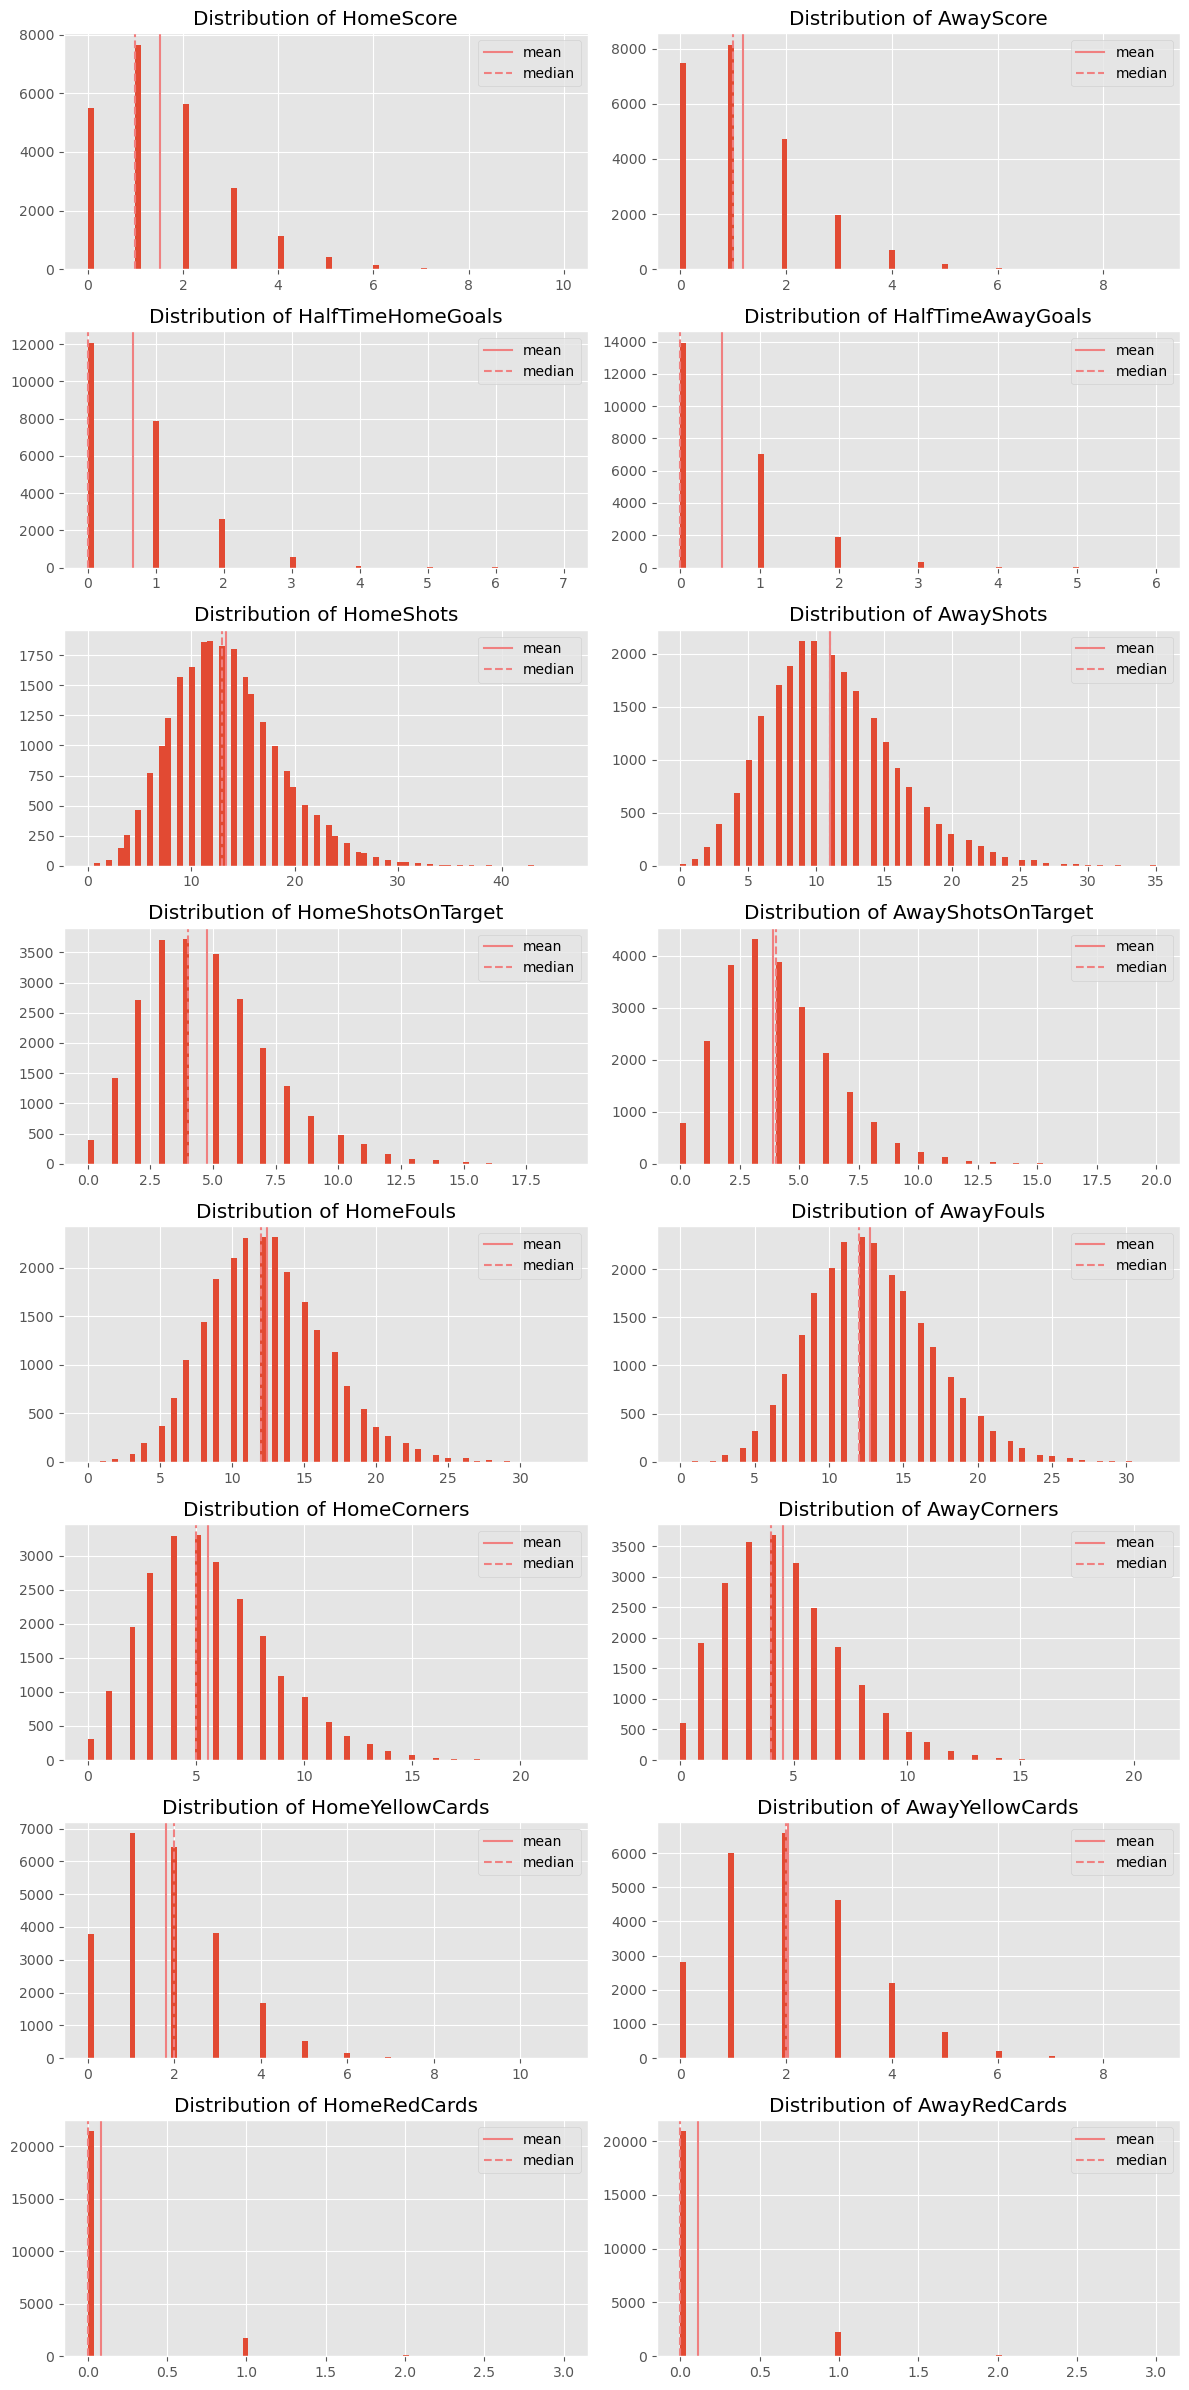

In [27]:
#changing the style of the plot
plt.style.use('ggplot')

# Create a figure with 6 rows and 2 columns
fig, axs = plt.subplots(8, 2, figsize=(12, 24))

# Plot numeric columns in each subplot
for i, column in enumerate(data1.select_dtypes("number").columns):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(data1[column], bins=80)
    axs[row, col].axvline(data1[column].mean(), 0, 1000, label="mean", color="lightcoral")
    axs[row, col].axvline(data1[column].median(), 0, 1000, label="median", color="lightcoral", linestyle="--")
    axs[row, col].set_title(f"Distribution of {column}")
    axs[row, col].legend()

plt.tight_layout()
plt.show()


## Visualizing Categoric Variables

First let's look at the proportions of winning teams after 90 minutes and compare them to matches when the team is leading at half:

<div>
<img src="https://i.ibb.co/py3kCkC/RESULTS.jpg" width="800"/>
</div>

Let's take a look the most common teams in each league. We can group the data by `Home Team` since each team plays an even amount of home and away matches each season:

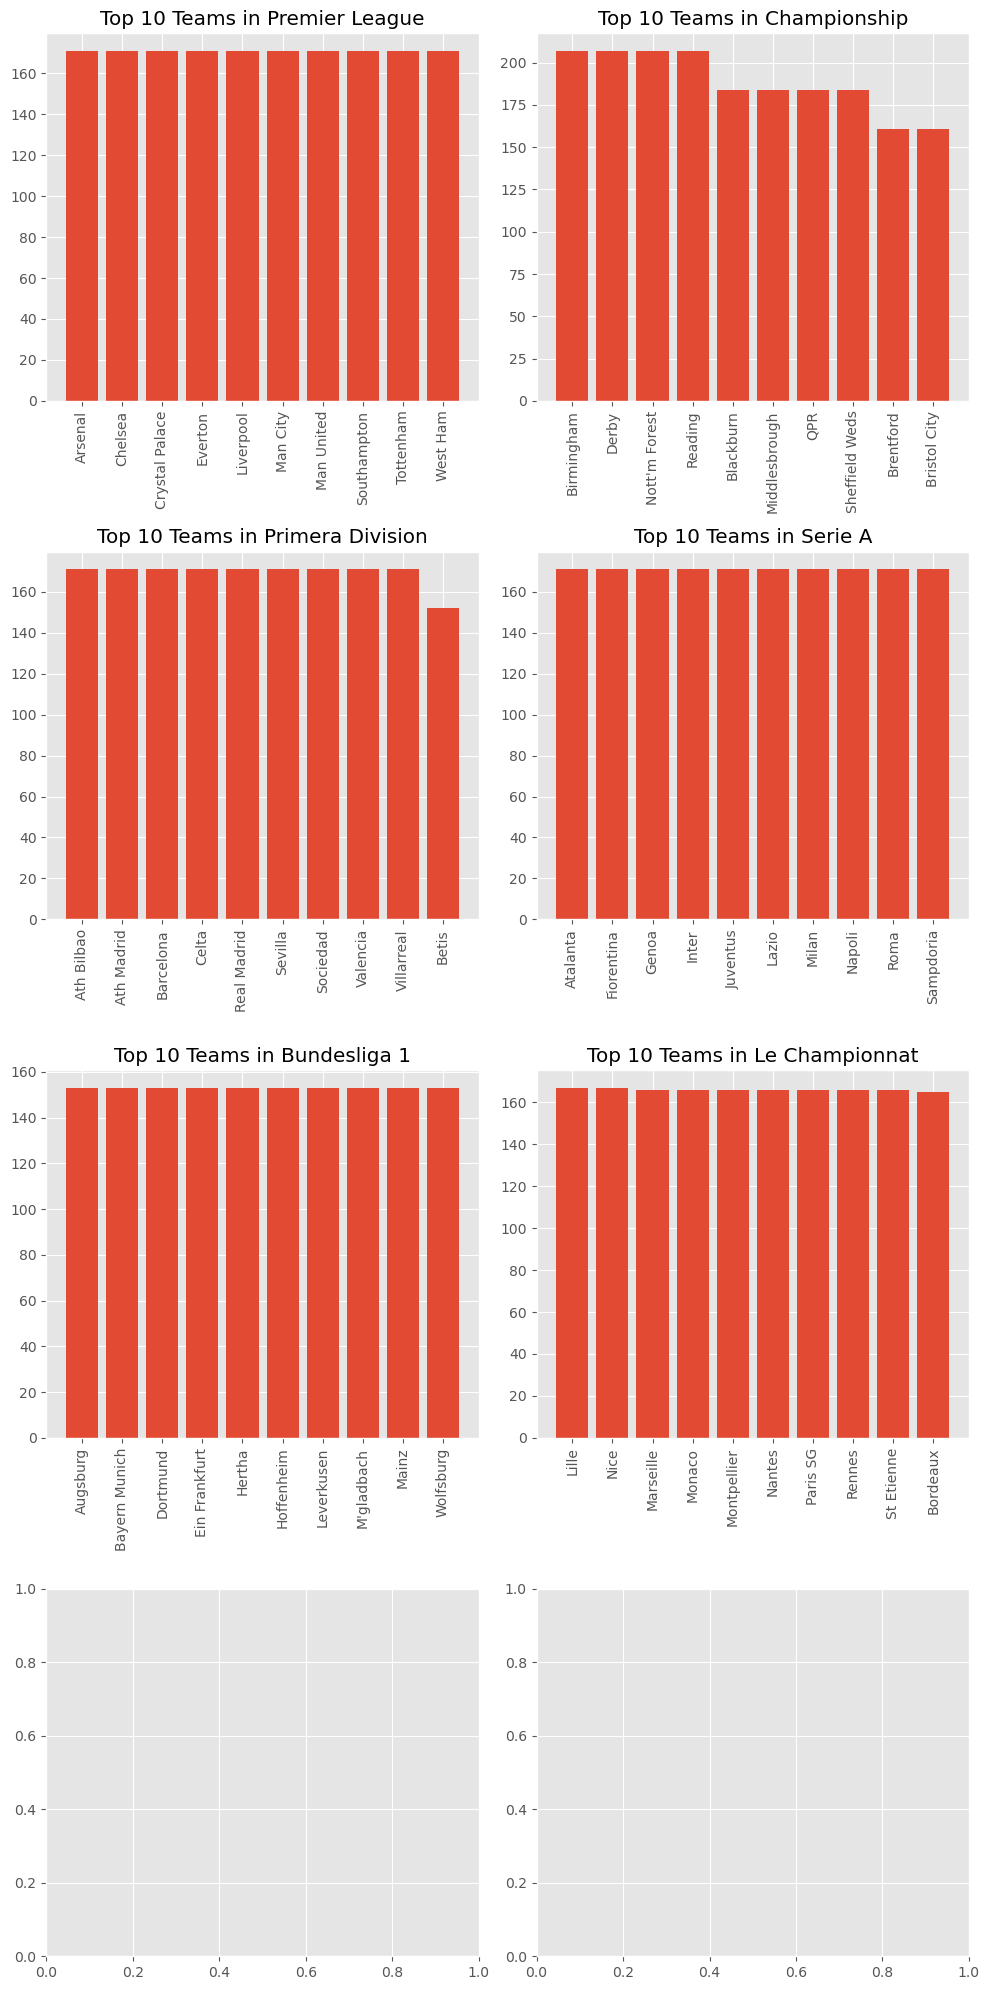

In [28]:
# Group data by league and count the number of occurrences of each team
league_counts = data1.groupby('League')['HomeTeam'].value_counts()

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Loop over each league and plot the top 10 teams
for i, league in enumerate(data['League'].unique()):
    top_teams = league_counts[league].nlargest(10)
    axs[i//2, i%2].bar(top_teams.index, top_teams.values)
    axs[i//2, i%2].set_title(f'Top 10 Teams in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)



# Adjusting
plt.tight_layout()
plt.show()


Now let's take a look at which team's have won the most games when playing at home:

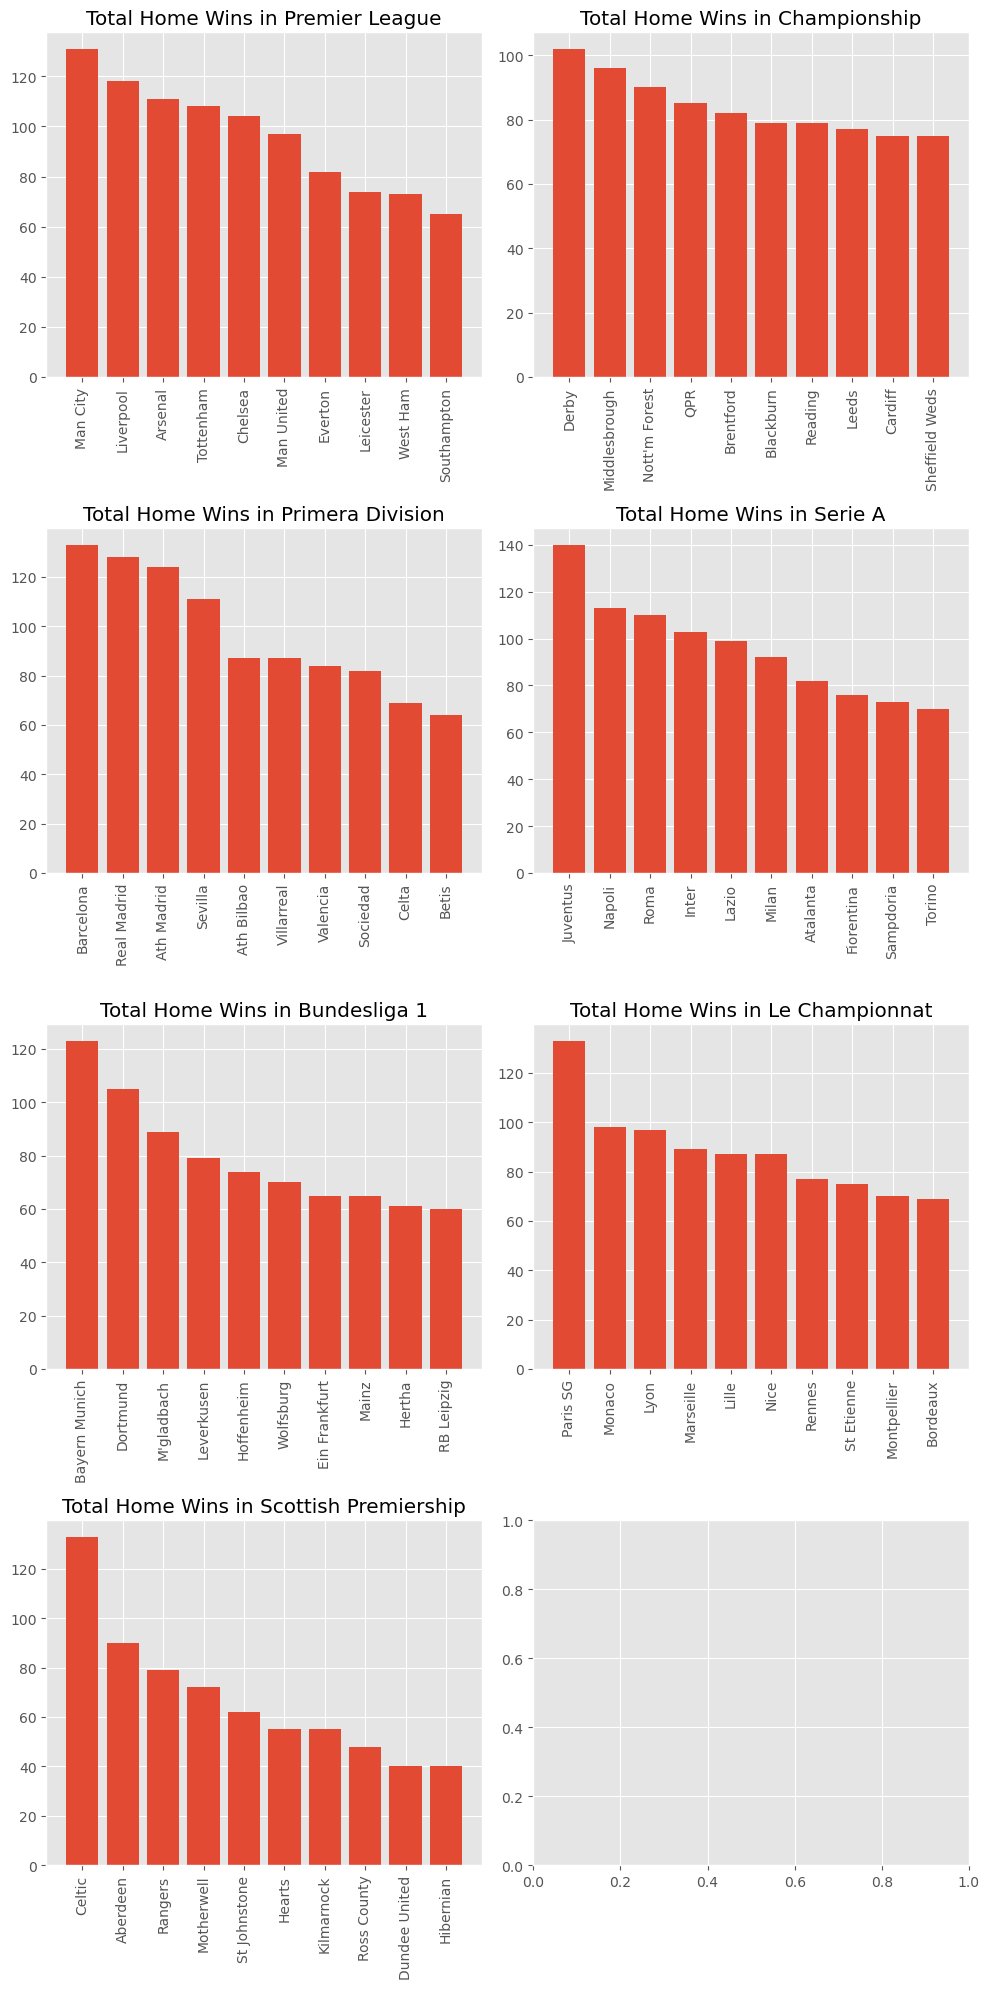

In [29]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'H'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Home Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

Which team's have won the most playing away:

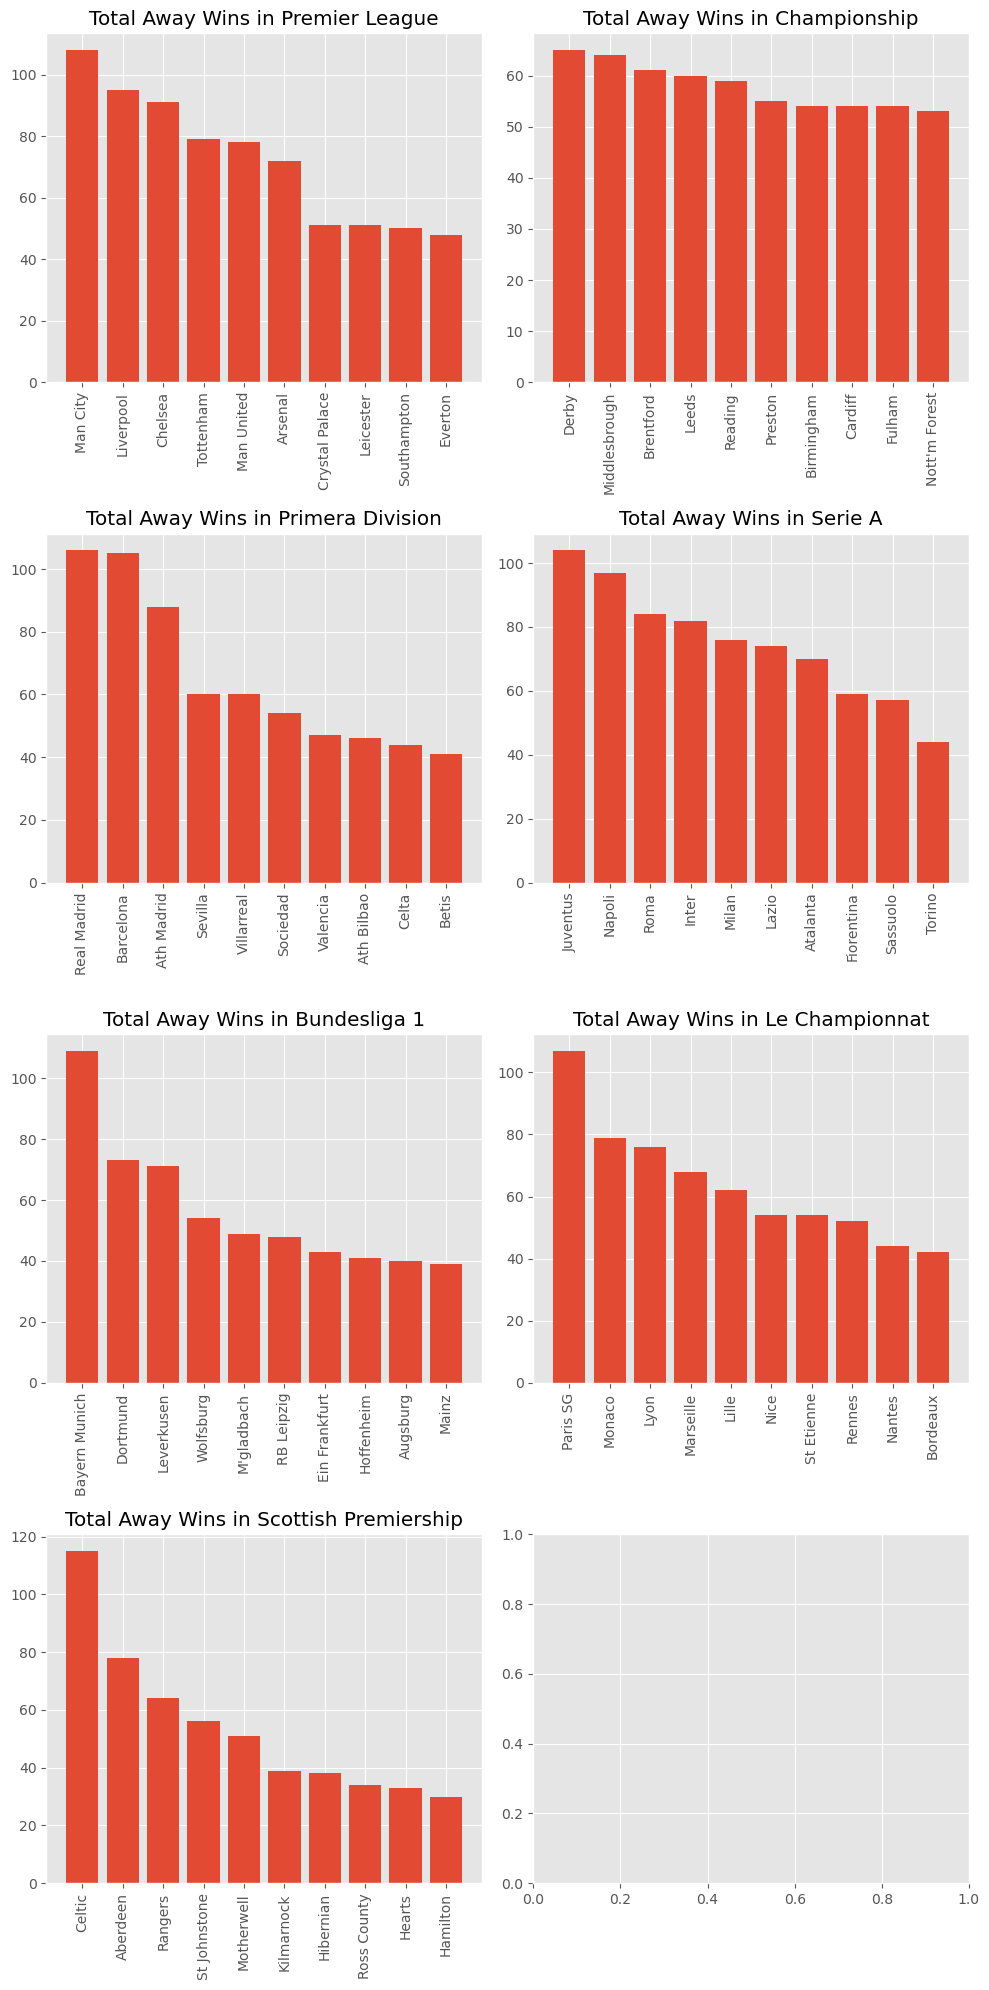

In [30]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'A'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Away Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

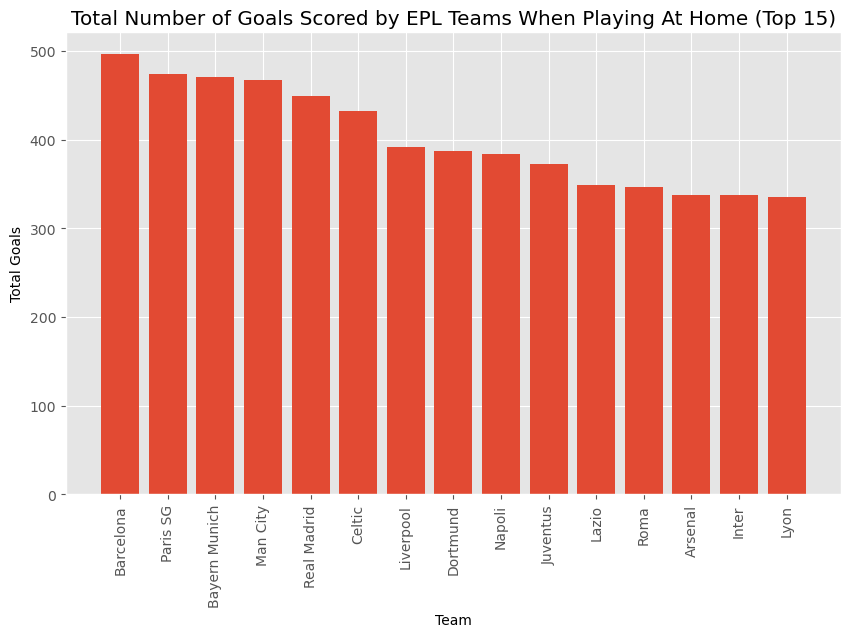

In [83]:
goals_df = data1.groupby('HomeTeam')['HomeScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='HomeScore', ascending=False)
top30_df = goals_df.head(15)




plt.figure(figsize=(10, 6))
plt.bar(top30_df['HomeTeam'], top30_df['HomeScore'])
plt.title('Total Number of Goals Scored by EPL Teams When Playing At Home (Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [82]:
team_scores = data1.groupby('HomeTeam').agg({'HomeScore': 'sum'})
sorted_scores = team_scores.sort_values(by='HomeScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)



               HomeScore
HomeTeam                
Barcelona          496.0
Paris SG           474.0
Bayern Munich      470.0
Man City           467.0
Real Madrid        449.0
Celtic             432.0
Liverpool          391.0
Dortmund           387.0
Napoli             384.0
Juventus           372.0
Lazio              349.0
Roma               347.0
Arsenal            338.0
Inter              338.0
Lyon               335.0


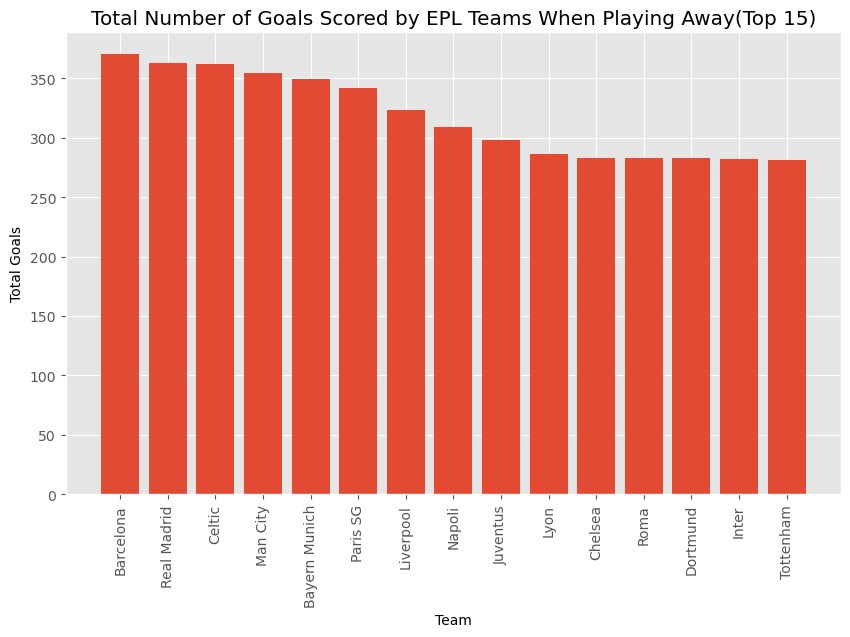

In [84]:
goals_df = data1.groupby('AwayTeam')['AwayScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='AwayScore', ascending=False)
top30_df = goals_df.head(15)




plt.figure(figsize=(10, 6))
plt.bar(top30_df['AwayTeam'], top30_df['AwayScore'])
plt.title('Total Number of Goals Scored by EPL Teams When Playing Away(Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [69]:
goal_counts = data1.groupby("HomeTeam")["HomeScore"].value_counts().reset_index(name="Counts").groupby("HomeTeam")["Counts"].sum()
sorted_counts = value_counts.sort_values(ascending=False)
print(sorted_counts)

AwayTeam   AwayScore
Wigan      114.0        1
Wolfsburg  209.0        1
Wolves     195.0        1
Wycombe    22.0         1
Yeovil     25.0         1
dtype: int64


In [ ]:
data1.to_csv('Euro Football Cleaner.csv', index=False)